In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

from dataclasses import dataclass
from datetime import datetime, timedelta
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns

mpl.rcParams['figure.figsize'] = [8, 5]
sns.set_style('whitegrid', {'axes.labelcolor': '0', "text.color": '0', 'xtick.color': '0', 'ytick.color': '0', 'font.sans-serif': ['DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],})
sns.set_context('notebook', font_scale=1)

### A quick look at 7-day mean/95% CI new cases

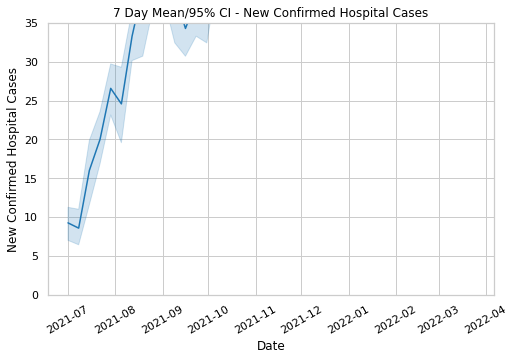

In [3]:
rdf=pd.read_csv('./data/reportedcases.csv', parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y-%m-%d"))
rdf.Date = rdf.Date.dt.round('7D')
ax=sns.lineplot(data=rdf, x='Date', y='HospitalCases')
ax.set_ylim((0,35))
ax.set_title('7 Day Mean/95% CI - New Confirmed Hospital Cases')
ax.set_ylabel('New Confirmed Hospital Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_7d_mean_ci95.png', bbox_inches='tight')

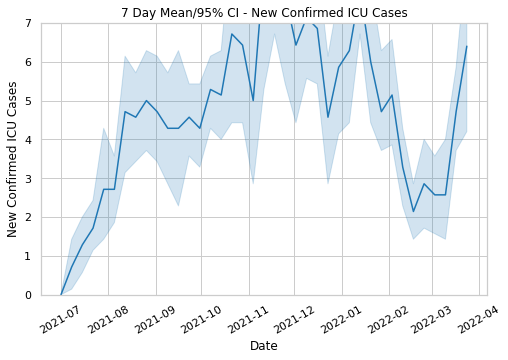

In [4]:
ax=sns.lineplot(data=rdf, x='Date', y='IcuCases')
ax.set_ylim((0,7))
ax.set_title('7 Day Mean/95% CI - New Confirmed ICU Cases')
ax.set_ylabel('New Confirmed ICU Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_icu_7d_mean_ci95.png', bbox_inches='tight')

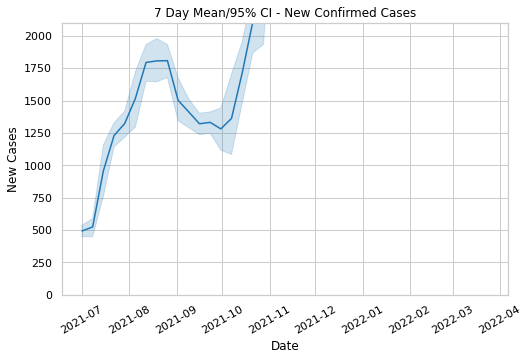

In [5]:
ax=sns.lineplot(data=rdf, x='Date', y='Cases')
ax.set_ylim((0,2100))
ax.set_title('7 Day Mean/95% CI - New Confirmed Cases')
ax.set_ylabel('New Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_cases_7d_mean_ci95.png', bbox_inches='tight')

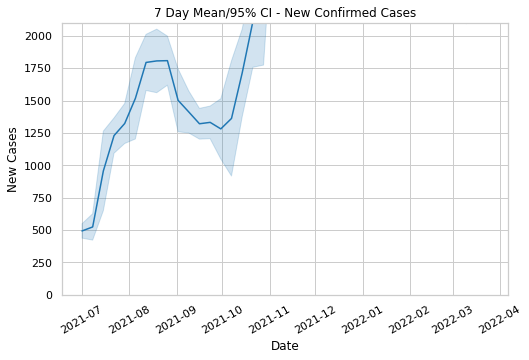

In [6]:
ax=sns.lineplot(data=rdf, x='Date', y='Cases', ci='sd')
ax.set_ylim((0,2100))
ax.set_title('7 Day Mean/95% CI - New Confirmed Cases')
ax.set_ylabel('New Cases')
plt.xticks(rotation=30);
#plt.savefig(f'./figures/reported_cases_7d_mean_ci95.png', bbox_inches='tight')

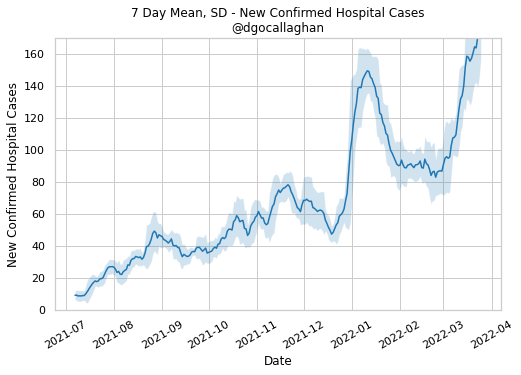

In [7]:
mdf=pd.read_csv('./data/reportedcases.csv', parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y-%m-%d"))
mdf['7dhosp']=mdf.HospitalCases.rolling(7).mean().dropna()
ax=sns.lineplot(data=mdf, x='Date', y='7dhosp')
ax.set_ylim((0,170))
ax.set_title('7 Day Mean, SD - New Confirmed Hospital Cases\n@dgocallaghan')
ax.set_ylabel('New Confirmed Hospital Cases')
hospstd = mdf.HospitalCases.rolling(7).std()
ax.fill_between(mdf.Date, mdf['7dhosp'] - hospstd, mdf['7dhosp'] + hospstd, alpha=0.2)
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_7d_mean_sd.png', bbox_inches='tight')

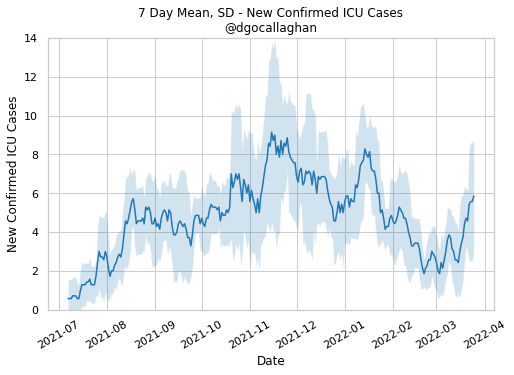

In [8]:
mdf['7dicu']=mdf.IcuCases.rolling(7).mean().dropna()
ax=sns.lineplot(data=mdf, x='Date', y='7dicu')
ax.set_ylim((0,14))
ax.set_title('7 Day Mean, SD - New Confirmed ICU Cases\n@dgocallaghan')
ax.set_ylabel('New Confirmed ICU Cases')
icustd = mdf.IcuCases.rolling(7).std()
ax.fill_between(mdf.Date, mdf['7dicu'] - icustd, mdf['7dicu'] + icustd, alpha=0.2)
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_icu_7d_mean_sd.png', bbox_inches='tight')

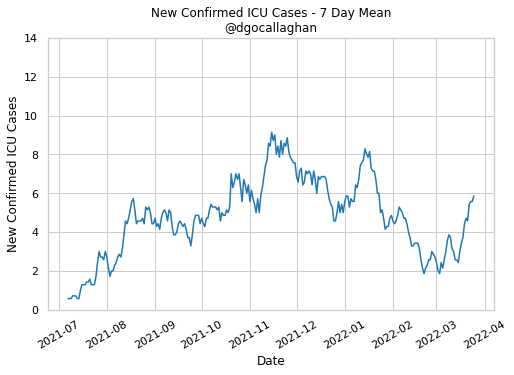

In [9]:
ax=sns.lineplot(data=mdf, x='Date', y='7dicu')
ax.set_ylim((0,14))
ax.set_title('New Confirmed ICU Cases - 7 Day Mean\n@dgocallaghan')
ax.set_ylabel('New Confirmed ICU Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_icu_7d_mean.png', bbox_inches='tight')

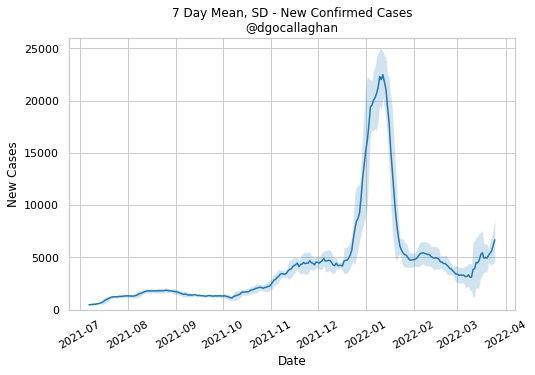

In [10]:
mdf['7dcases']=mdf.Cases.rolling(7).mean().dropna()
ax=sns.lineplot(data=mdf, x='Date', y='7dcases')
ax.set_ylim((0,26000))
ax.set_title('7 Day Mean, SD - New Confirmed Cases\n@dgocallaghan')
ax.set_ylabel('New Cases')
casesstd = mdf.Cases.rolling(7).std()
ax.fill_between(mdf.Date, mdf['7dcases'] - casesstd, mdf['7dcases'] + casesstd, alpha=0.2)
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_cases_7d_mean_sd.png', bbox_inches='tight')

### A quick look at the percentage of Confirmed Hospital Cases that are **non-admission**

Uses a daily snapshot of:

* [Covid-19 Acute Hospital Historic Summary](https://covid-19.geohive.ie/datasets/fe9bb23592ec4142a4f4c2c9bd32f749_0/explore?location=53.385818%2C-8.057012%2C7.64&showTable=true) ([CSV](https://opendata.arcgis.com/api/v3/datasets/fe9bb23592ec4142a4f4c2c9bd32f749_0/downloads/data?format=csv&spatialRefId=4326))

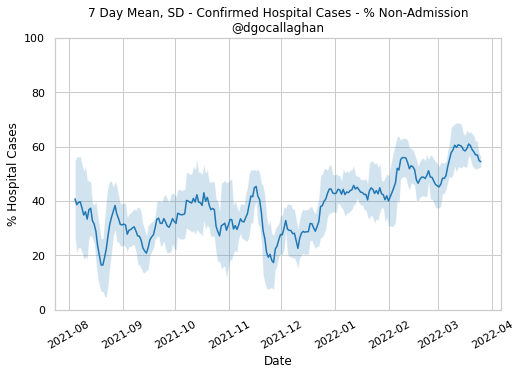

In [11]:
hdf=pd.read_csv('./data/Covid19AcuteHospitalHistoricSummaryOpenData.csv', parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y/%m/%d %H:00:00+00"))
hdf=hdf[hdf.Date>='2021-07-01'][['Date', 'SUM_no_new_admissions_covid19_p', 'SUM_no_discharges_covid19_posit', 'SUM_number_of_new_covid_19_cases_co']].dropna()
hdf['perc_nonadmiss']=hdf[['SUM_no_new_admissions_covid19_p', 'SUM_number_of_new_covid_19_cases_co']].dropna().apply(lambda x:((x[1]-x[0])*100)/x[1], axis=1)
hdf['7dperc']=hdf.perc_nonadmiss.rolling(7).mean().dropna()
ax=sns.lineplot(data=hdf, x='Date', y='7dperc')
ax.set_ylim((0,100))
ax.set_title('7 Day Mean, SD - Confirmed Hospital Cases - % Non-Admission\n@dgocallaghan')
ax.set_ylabel('% Hospital Cases')
percstd = hdf.perc_nonadmiss.rolling(7).std()
ax.fill_between(hdf.Date, hdf['7dperc'] - percstd, hdf['7dperc'] +percstd, alpha=0.2)
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_7d_mean_sd.png', bbox_inches='tight')

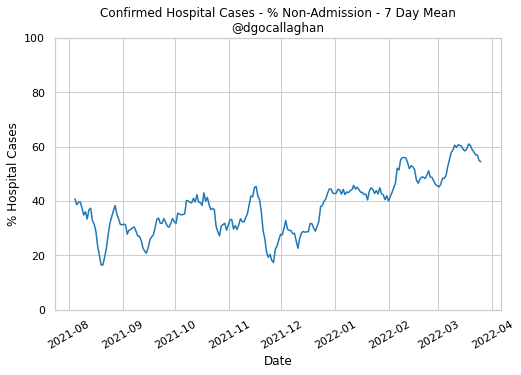

In [12]:
ax=sns.lineplot(data=hdf, x='Date', y='7dperc')
ax.set_ylim((0,100))
ax.set_title('Confirmed Hospital Cases - % Non-Admission - 7 Day Mean\n@dgocallaghan')
ax.set_ylabel('% Hospital Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosppercnonadmission_7d_mean.png', bbox_inches='tight')

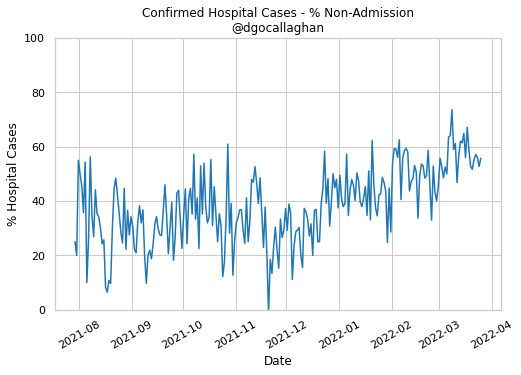

In [13]:
ax=sns.lineplot(data=hdf, x='Date', y='perc_nonadmiss')
ax.set_ylim((0,100))
ax.set_title('Confirmed Hospital Cases - % Non-Admission\n@dgocallaghan')
ax.set_ylabel('% Hospital Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_perc_nonadmiss.png', bbox_inches='tight')

In [14]:
hdf.perc_nonadmiss.describe()

count    240.000000
mean      38.450464
std       13.676472
min       -1.250000
25%       29.201779
50%       37.638889
75%       48.456838
max       73.600000
Name: perc_nonadmiss, dtype: float64

In [15]:
hdf[['SUM_no_new_admissions_covid19_p', 'SUM_number_of_new_covid_19_cases_co']].sum()

SUM_no_new_admissions_covid19_p        10261.0
SUM_number_of_new_covid_19_cases_co    17951.0
dtype: float64

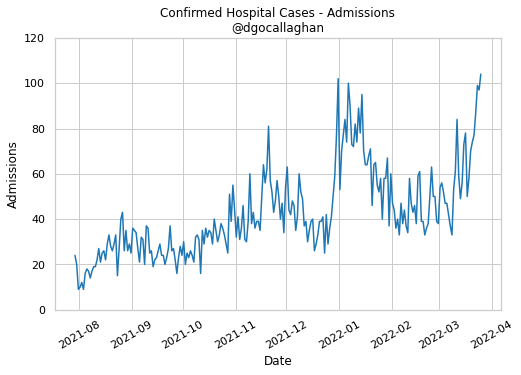

In [16]:
ax=sns.lineplot(data=hdf, x='Date', y='SUM_no_new_admissions_covid19_p')
ax.set_ylim((0,120))
ax.set_title('Confirmed Hospital Cases - Admissions\n@dgocallaghan')
ax.set_ylabel('Admissions')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_admissions.png', bbox_inches='tight')

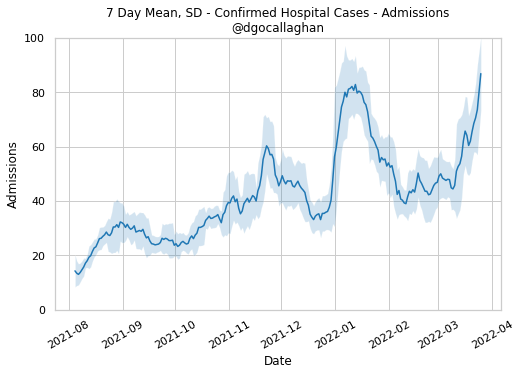

In [17]:
hdf['7dadmissions']=hdf.SUM_no_new_admissions_covid19_p.rolling(7).mean().dropna()
ax=sns.lineplot(data=hdf, x='Date', y='7dadmissions')
ax.set_ylim((0,100))
ax.set_title('7 Day Mean, SD - Confirmed Hospital Cases - Admissions\n@dgocallaghan')
ax.set_ylabel('Admissions')
admissionsstd = hdf.SUM_no_new_admissions_covid19_p.rolling(7).std()
ax.fill_between(hdf.Date, hdf['7dadmissions'] - admissionsstd, hdf['7dadmissions'] + admissionsstd, alpha=0.2)
plt.xticks(rotation=30);
#plt.savefig(f'./figures/reported_hosp_7d_mean_sd.png', bbox_inches='tight')

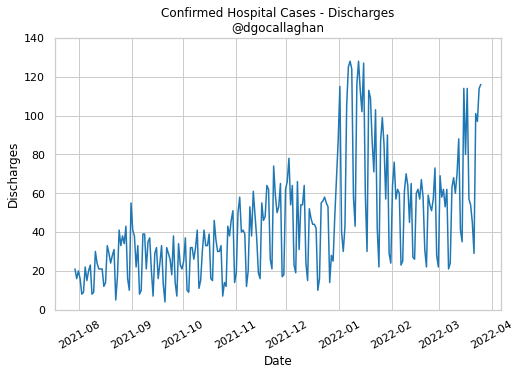

In [18]:
ax=sns.lineplot(data=hdf, x='Date', y='SUM_no_discharges_covid19_posit')
ax.set_ylim((0,140))
ax.set_title('Confirmed Hospital Cases - Discharges\n@dgocallaghan')
ax.set_ylabel('Discharges')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_discharges.png', bbox_inches='tight')

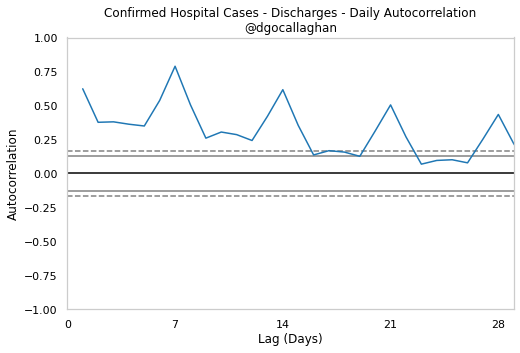

In [19]:
ax = pd.plotting.autocorrelation_plot(hdf.SUM_no_discharges_covid19_posit)
ax.set_xlim([0, 29]);
ax.set_xticks(range(0, 35, 7))
ax.set_title('Confirmed Hospital Cases - Discharges - Daily Autocorrelation\n@dgocallaghan')
ax.set_xlabel('Lag (Days)')
plt.savefig(f'./figures/reported_hosp_discharges_autocorrelation.png', bbox_inches='tight');

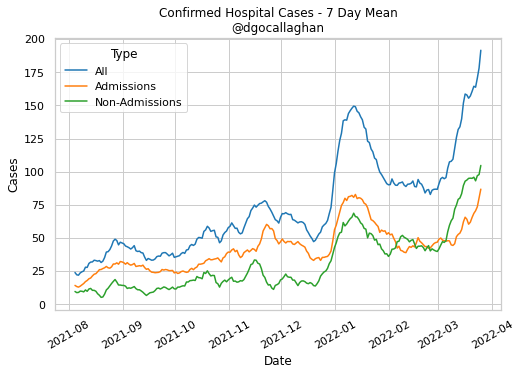

In [20]:
hdf = hdf.rename(columns={'SUM_number_of_new_covid_19_cases_co': 'All', 'SUM_no_new_admissions_covid19_p': 'Admissions'})
hdf['Non-Admissions'] = hdf.All - hdf.Admissions
meanhdf = hdf.copy(deep=True)
meanhdf.All = meanhdf.All.rolling(7).mean().dropna()
meanhdf.Admissions = meanhdf.Admissions.rolling(7).mean().dropna()
meanhdf['Non-Admissions'] = meanhdf['Non-Admissions'].rolling(7).mean().dropna()
ax=sns.lineplot(data=pd.melt(meanhdf[['Date', 'All', 'Admissions', 'Non-Admissions']], id_vars='Date', var_name='Type', value_name='Cases'), x='Date', y='Cases', hue='Type')
ax.set_title('Confirmed Hospital Cases - 7 Day Mean\n@dgocallaghan')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_casetypes.png', bbox_inches='tight')

In [21]:
meanhdf

,Date,Admissions,SUM_no_discharges_covid19_posit,All,perc_nonadmiss,7dperc,7dadmissions,Non-Admissions
506,2021-07-29 11:00:00,NaN,21.0,NaN,25.000000,NaN,NaN,NaN
507,2021-07-30 11:00:00,NaN,16.0,NaN,20.000000,NaN,NaN,NaN
508,2021-07-31 11:00:00,NaN,20.0,NaN,55.000000,NaN,NaN,NaN
509,2021-08-01 11:00:00,NaN,16.0,NaN,50.000000,NaN,NaN,NaN
510,2021-08-02 11:00:00,NaN,8.0,NaN,45.454545,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
741,2022-03-21 11:00:00,68.571429,29.0,164.428571,55.232558,58.053687,68.571429,95.857143
742,2022-03-22 11:00:00,70.571429,101.0,163.714286,57.142857,56.944974,70.571429,93.142857
743,2022-03-23 11:00:00,73.571429,97.0,170.571429,56.000000,56.954659,73.571429,97.000000
744,2022-03-24 11:00:00,80.285714,114.0,178.142857,52.682927,54.894326,80.285714,97.857143


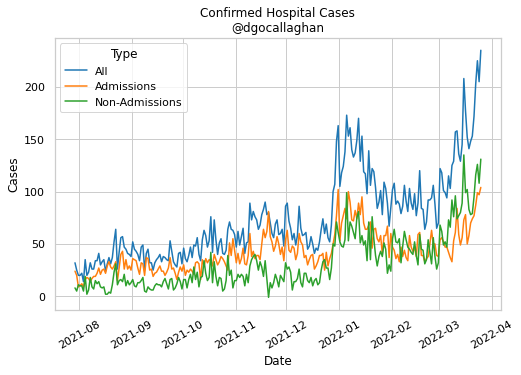

In [22]:
ax=sns.lineplot(data=pd.melt(hdf[['Date', 'All', 'Admissions', 'Non-Admissions']], id_vars='Date', var_name='Type', value_name='Cases'), x='Date', y='Cases', hue='Type')
ax.set_title('Confirmed Hospital Cases\n@dgocallaghan')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_casetypes_daily.png', bbox_inches='tight')

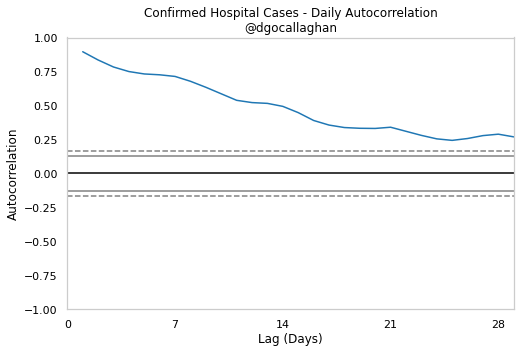

In [23]:
ax = pd.plotting.autocorrelation_plot(hdf.All)
ax.set_xlim([0, 29]);
ax.set_xticks(range(0, 35, 7))
ax.set_title('Confirmed Hospital Cases - Daily Autocorrelation\n@dgocallaghan')
ax.set_xlabel('Lag (Days)');

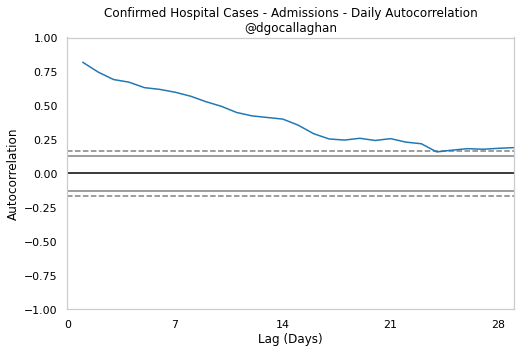

In [24]:
ax = pd.plotting.autocorrelation_plot(hdf.Admissions)
ax.set_xlim([0, 29]);
ax.set_xticks(range(0, 35, 7))
ax.set_title('Confirmed Hospital Cases - Admissions - Daily Autocorrelation\n@dgocallaghan')
ax.set_xlabel('Lag (Days)');

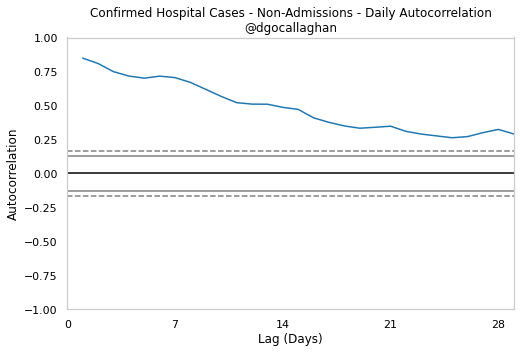

In [25]:
ax = pd.plotting.autocorrelation_plot(hdf['Non-Admissions'])
ax.set_xlim([0, 29]);
ax.set_xticks(range(0, 35, 7))
ax.set_title('Confirmed Hospital Cases - Non-Admissions - Daily Autocorrelation\n@dgocallaghan')
ax.set_xlabel('Lag (Days)');

In [26]:
hdf['7dperc'].tail(15)

731    59.721800
732    60.667178
733    60.458213
734    60.072733
735    58.830425
736    58.404350
737    59.255602
738    60.974146
739    60.414868
740    58.931794
741    58.053687
742    56.944974
743    56.954659
744    54.894326
745    54.448530
Name: 7dperc, dtype: float64

In [27]:
whdf = hdf[(hdf.Date>='2022-01-01') & (hdf.Date<'2022-03-26')].resample('7D', on='Date').sum().reset_index()
d = timedelta(days=6)
whdf['strdate'] = whdf.Date.apply(lambda x: (x+d).strftime('%Y-%m-%d'))
whdf['Week'] = whdf.index+1
whdf

,Date,Admissions,SUM_no_discharges_covid19_posit,All,perc_nonadmiss,7dperc,7dadmissions,Non-Admissions,strdate,Week
0,2022-01-01,548.0,586.0,972.0,303.200771,303.693435,503.571429,424.0,2022-01-07,1
1,2022-01-08,563.0,684.0,1011.0,309.293800,310.393709,568.428571,448.0,2022-01-14,2
2,2022-01-15,447.0,596.0,820.0,313.781067,300.079762,515.571429,373.0,2022-01-21,3
3,2022-01-22,386.0,495.0,669.0,296.016549,303.322609,409.285714,283.0,2022-01-28,4
4,2022-01-29,331.0,402.0,629.0,326.382342,298.554442,364.857143,298.0,2022-02-04,5
5,2022-02-05,291.0,348.0,634.0,378.365520,380.538527,287.142857,343.0,2022-02-11,6
6,2022-02-12,333.0,364.0,640.0,335.540318,351.093363,318.285714,307.0,2022-02-18,7
7,2022-02-19,309.0,332.0,602.0,340.902061,343.867373,307.571429,293.0,2022-02-25,8
8,2022-02-26,336.0,365.0,663.0,338.216286,326.939500,334.714286,327.0,2022-03-04,9
9,2022-03-05,357.0,368.0,881.0,418.052599,394.009641,329.428571,524.0,2022-03-11,10


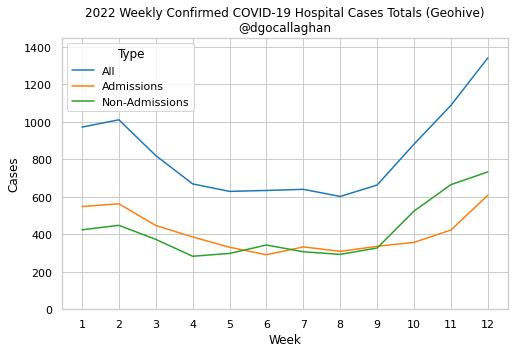

In [28]:
whdf = hdf[(hdf.Date>='2022-01-01') & (hdf.Date<'2022-03-26')].resample('7D', on='Date').sum().reset_index()
d = timedelta(days=6)
whdf['strdate'] = whdf.Date.apply(lambda x: (x+d).strftime('%Y-%m-%d'))
whdf['Week'] = whdf.index+1
#ax=sns.barplot(data=pd.melt(whdf[['Week', 'All', 'Admissions', 'Non-Admissions']], id_vars='Week', var_name='Type', value_name='Cases'), x='Week', y='Cases', hue='Type')
ax=sns.lineplot(data=pd.melt(whdf[['Week', 'All', 'Admissions', 'Non-Admissions']], id_vars='Week', var_name='Type', value_name='Cases'), x='Week', y='Cases', hue='Type')
ax.set_xticks(whdf.Week);
ax.set_ylim((0, 1450))
ax.set_title('2022 Weekly Confirmed COVID-19 Hospital Cases Totals (Geohive)\n@dgocallaghan')
plt.savefig(f'./figures/reported_hosp_casetypes_weekly.png', bbox_inches='tight')